In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/WDSS Project/df_3.csv', encoding='cp1252', parse_dates=['time'])

In [ ]:
df.head()

post_id  ... hour
0  424072494819359  ...    1
1  424072494819359  ...    1
2  424072494819359  ...    1
3  936663660226904  ...   18
4  934341140459156  ...   22

[5 rows x 15 columns]

In [ ]:
df.loc[:,'time'] = pd.to_datetime(df['time'], infer_datetime_format=True)

In [ ]:
post_counts = df.set_index('time').resample('MS').size()

post_counts

time
2019-01-01     67
2019-02-01     56
2019-03-01      1
2019-04-01      0
2019-05-01    223
2019-06-01    485
2019-07-01      0
2019-08-01      1
2019-09-01     63
2019-10-01      0
2019-11-01    282
2019-12-01    464
2020-01-01      0
2020-02-01      0
2020-03-01    418
2020-04-01      0
2020-05-01    310
2020-06-01    143
2020-07-01      0
2020-08-01      0
2020-09-01    406
2020-10-01      0
2020-11-01    224
2020-12-01    247
2021-01-01    179
2021-02-01    397
2021-03-01    569
2021-04-01     46
2021-05-01    101
2021-06-01    307
2021-07-01    271
Freq: MS, dtype: int64

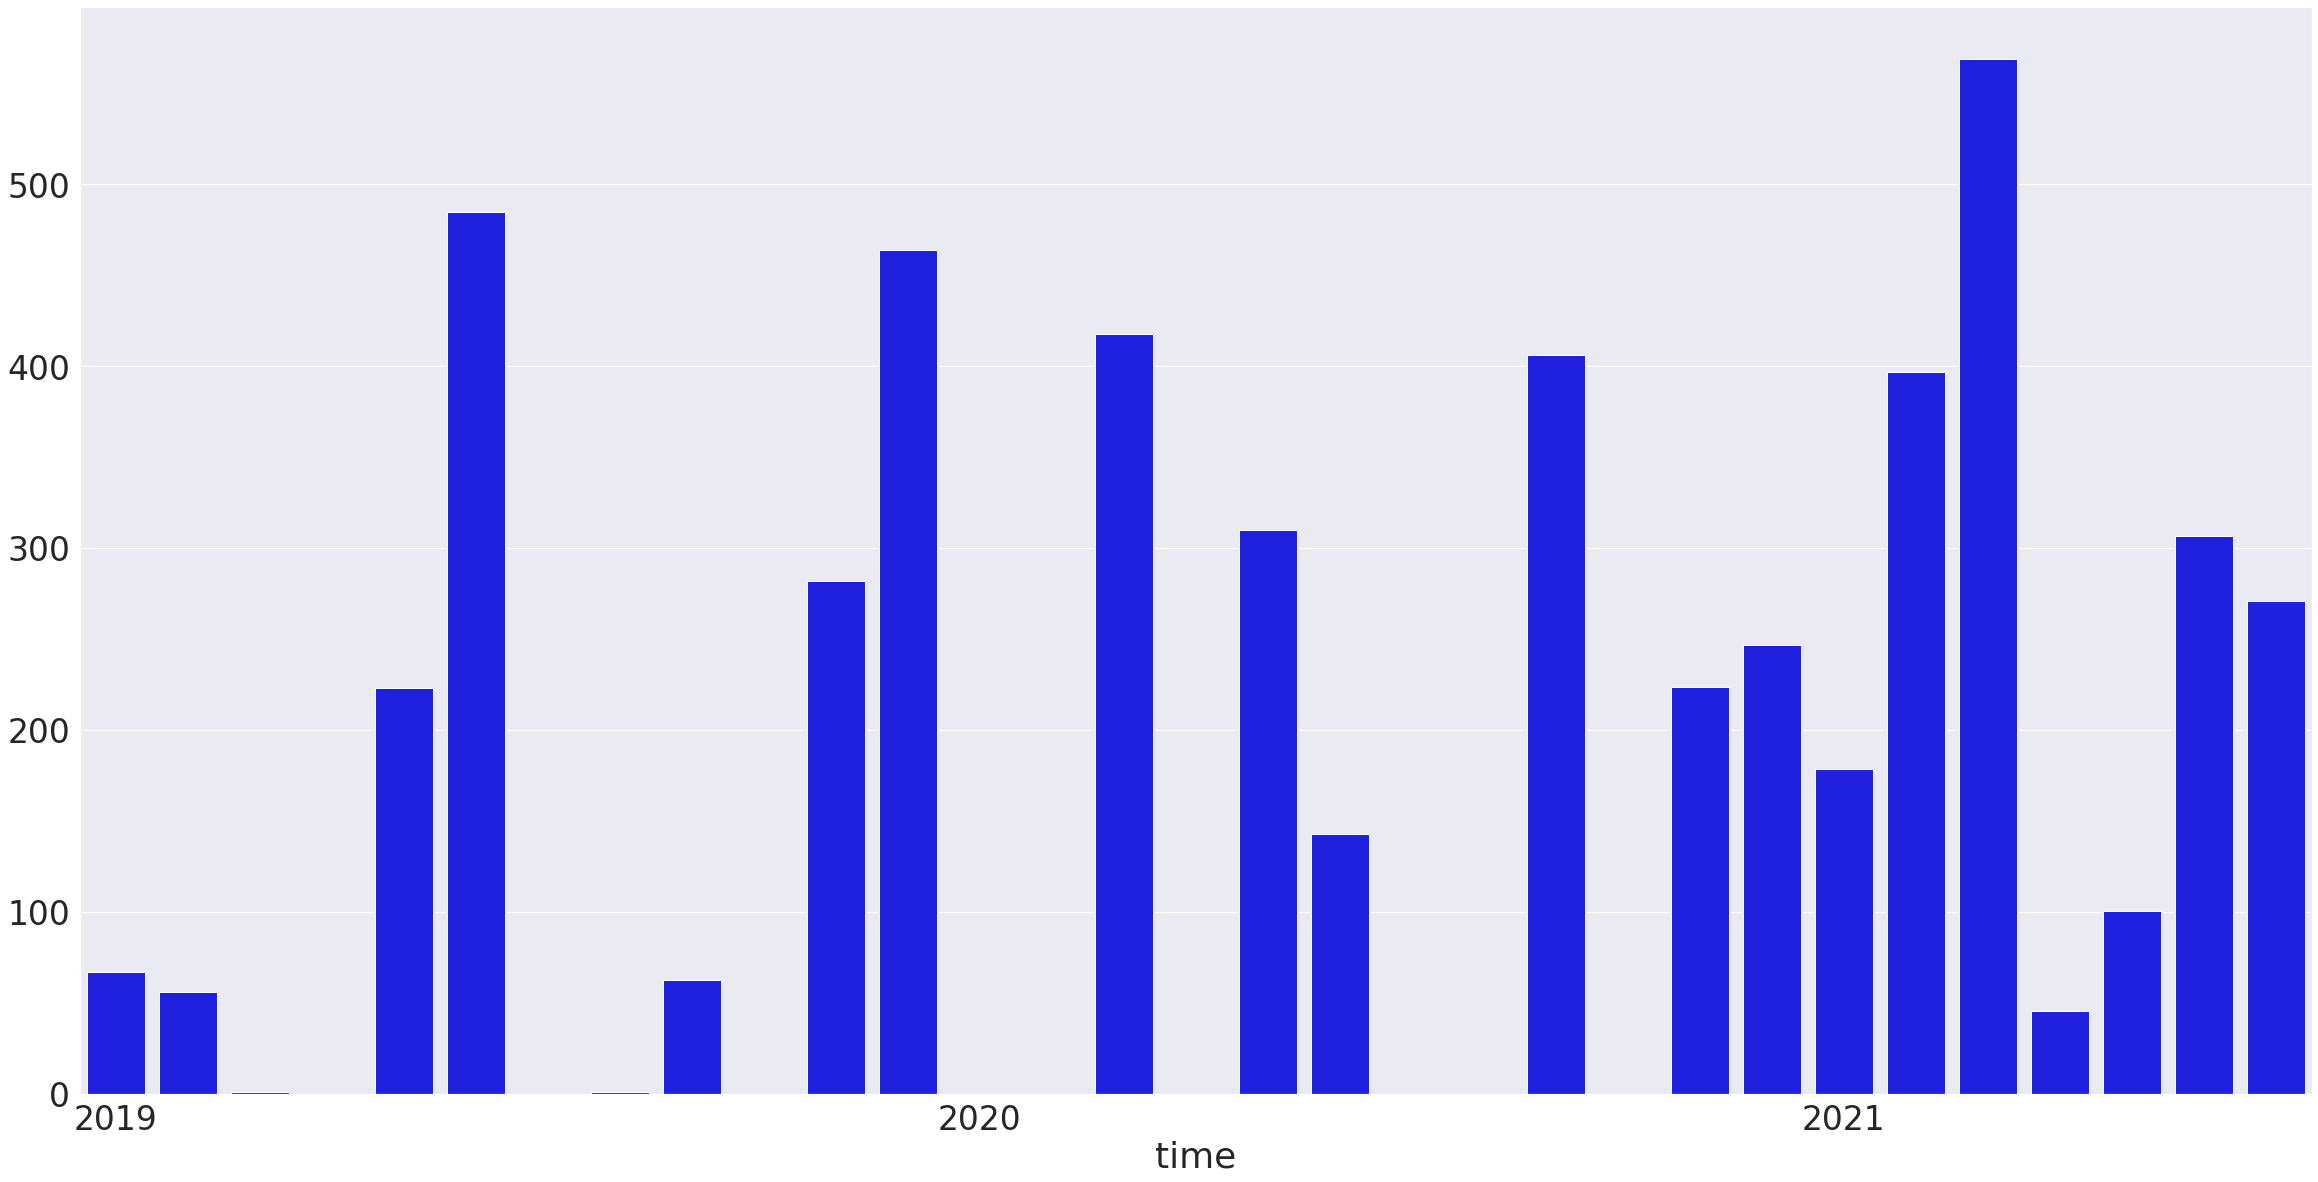

In [ ]:
# yearly
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)
x_labels = post_counts.index
sns.barplot(x = x_labels, y = post_counts, color="blue")
tick_positions = np.arange(0, len(x_labels), step=12)
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))
plt.show()

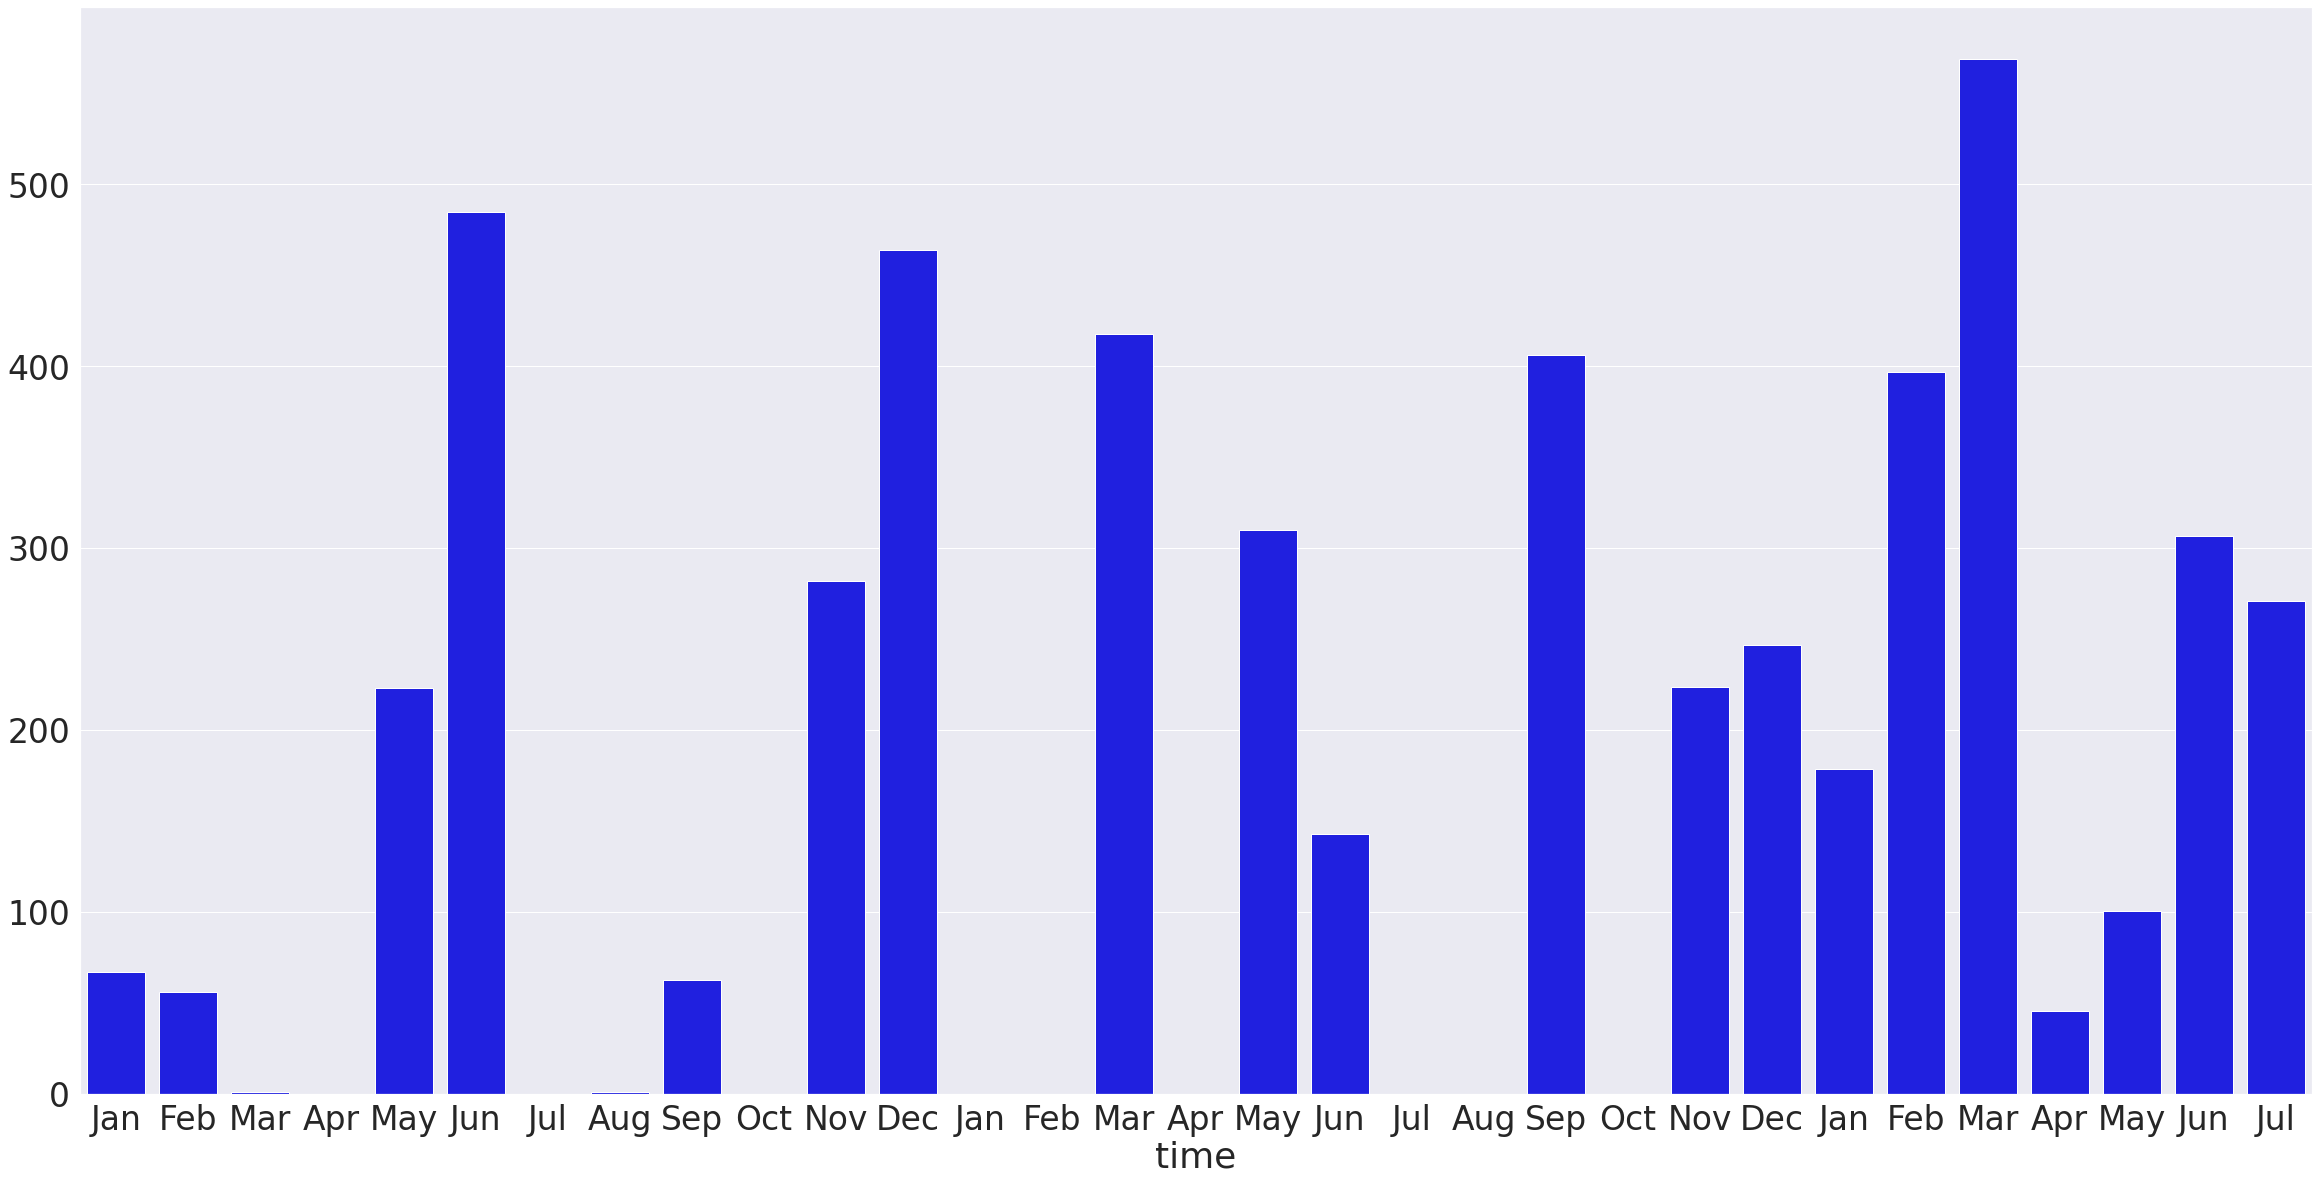

In [ ]:
# monthly
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)
x_labels = post_counts.index
sns.barplot(x = x_labels, y = post_counts, color="blue")
tick_positions = np.arange(0, len(x_labels), step=1)
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%b"))
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df['text'] = df['text'].str.lower()


In [ ]:
#tokenization
def identify_tokens(row):
    review = row['text']
    tokens = nltk.word_tokenize(review)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['text'] = df.apply(identify_tokens, axis=1)

In [ ]:
#stemming (draft)
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
def stem_list(row):
    my_list = row['text']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

df['text'] = df.apply(stem_list, axis=1)

In [ ]:
#lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
  
def lemmatize_list(row):
    my_list = row['text']
    lemm_list = [lemmatizer.lemmatize(word) for word in my_list]
    return (lemm_list)

df['text'] = df.apply(lemmatize_list, axis=1)

In [ ]:
#removing stop words
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['text']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

df['text'] = df.apply(remove_stops, axis=1)


In [ ]:
#rejoining
def rejoin_words(row):
    my_list = row['text']
    joined_words = (" ".join(my_list))
    return joined_words

df['text_joined'] = df.apply(rejoin_words, axis=1)


In [ ]:
#word2vec  
from gensim.models.word2vec import Word2Vec
model = Word2Vec(df['text'], min_count = 0)


In [ ]:
#most similar words to the word in bracket 
model.most_similar('love')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('one', 0.9999669790267944),
 ('people', 0.9999640583992004),
 ('even', 0.9999633431434631),
 ('get', 0.999963104724884),
 ('work', 0.9999607801437378),
 ('need', 0.9999606013298035),
 ('think', 0.9999604225158691),
 ('something', 0.9999597668647766),
 ('would', 0.9999594688415527),
 ('got', 0.9999591112136841)]

In [ ]:
from wordcloud import WordCloud

In [ ]:
final_text_spam = " ".join(df['text_joined'])
len(final_text_spam)

482372

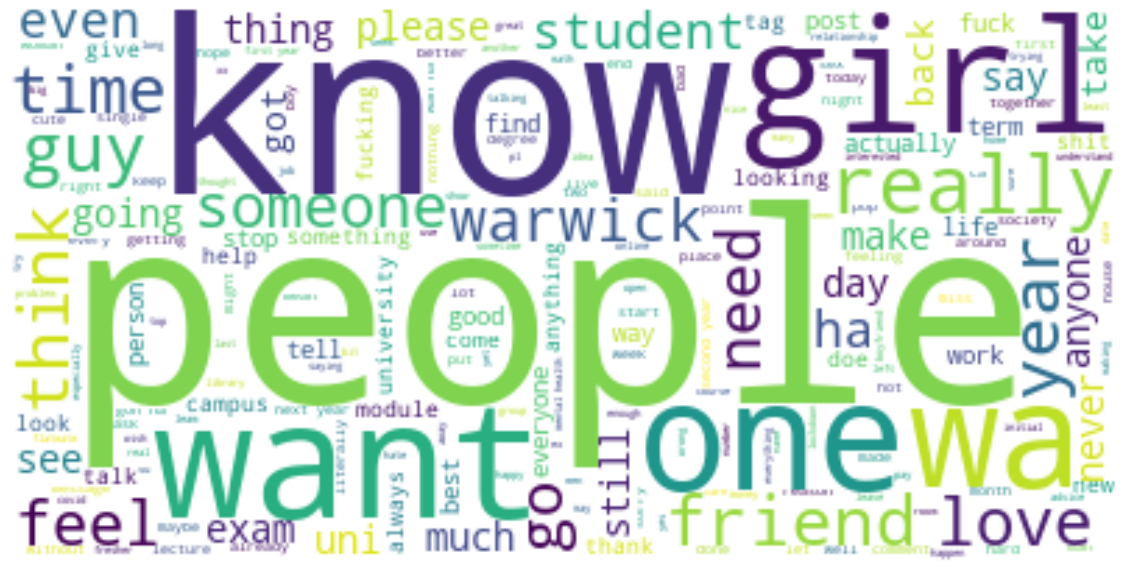

In [ ]:
wordcloud_spam = WordCloud(background_color="white").generate(final_text_spam)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from ast import literal_eval

df['reactions'] = df['reactions'].fillna({i: '{}' for i in df.index})  # if the column is not strings
df['reactions'] = df['reactions'].apply(lambda x : literal_eval(x))

# reset the index if the index is not unique integers from 0 to n-1
df.reset_index(inplace=True)  # uncomment if needed

# normalize the column of dictionaries and join it to df
df = df.join(pd.json_normalize(df.reactions))

In [ ]:
reaction_list = ['like',	'love',	'haha',	'wow',	'care',	'angry',	'sad']
max = df[reaction_list].idxmax(1)
df['top_reaction'] = max

top_reaction                                        text_joined
0        angry  dear brit ca drive right speak american accent...
1         care  rename rootes bulding fun would choose lot cro...
2         haha  feeling french person hear fellow native say l...
3         like  mental health link faq see latest relevant sta...
4         love  poll start game circle time trying target anyb...
5          sad  pret closed tho ex would give silent treatment...
6          wow  reminder graduate became liable council tax un...

angry


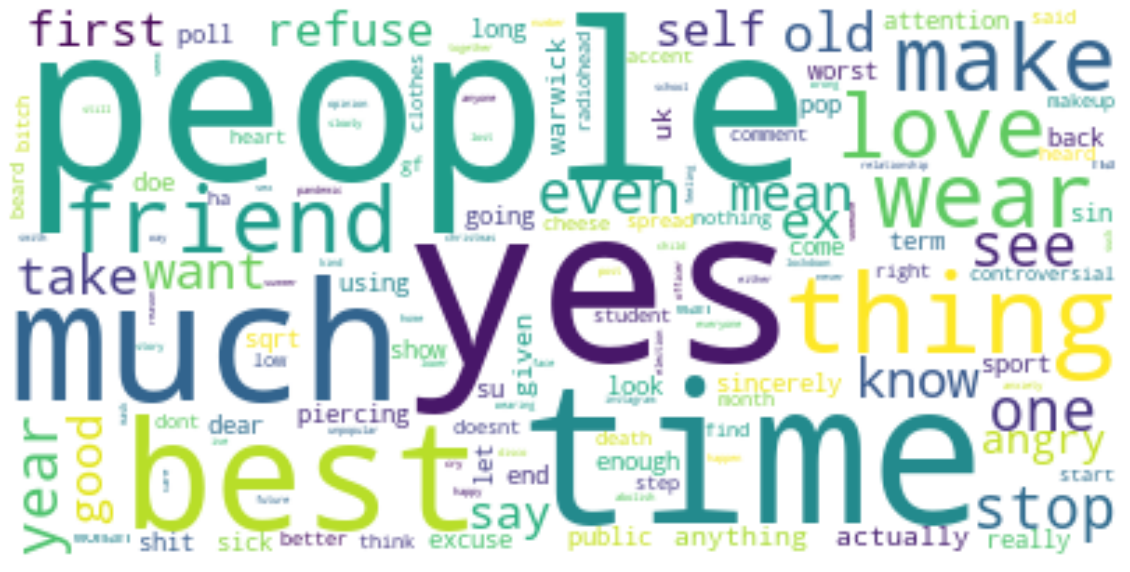

care


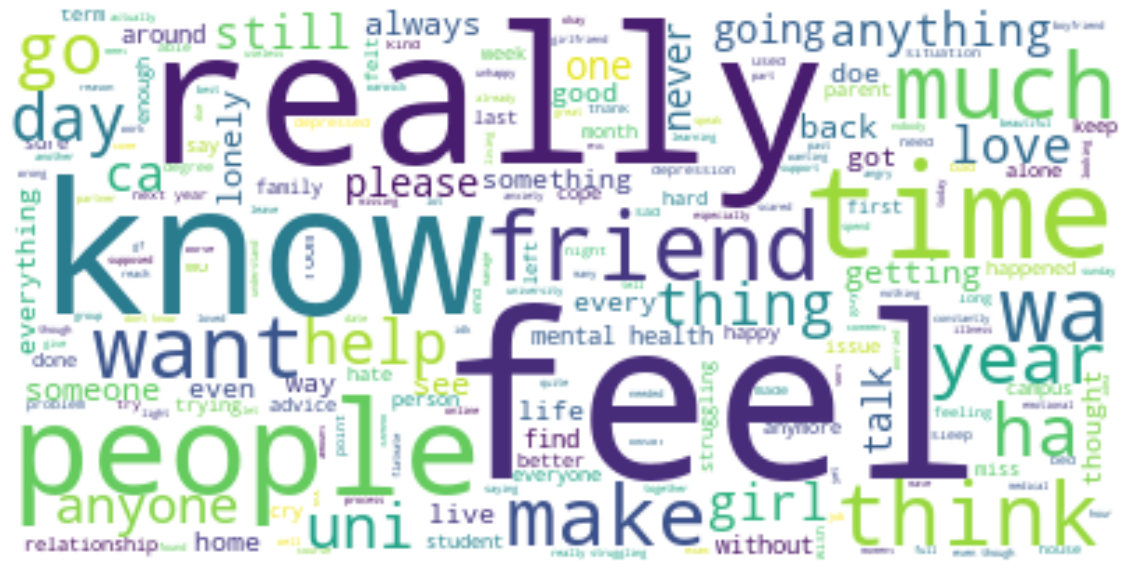

haha


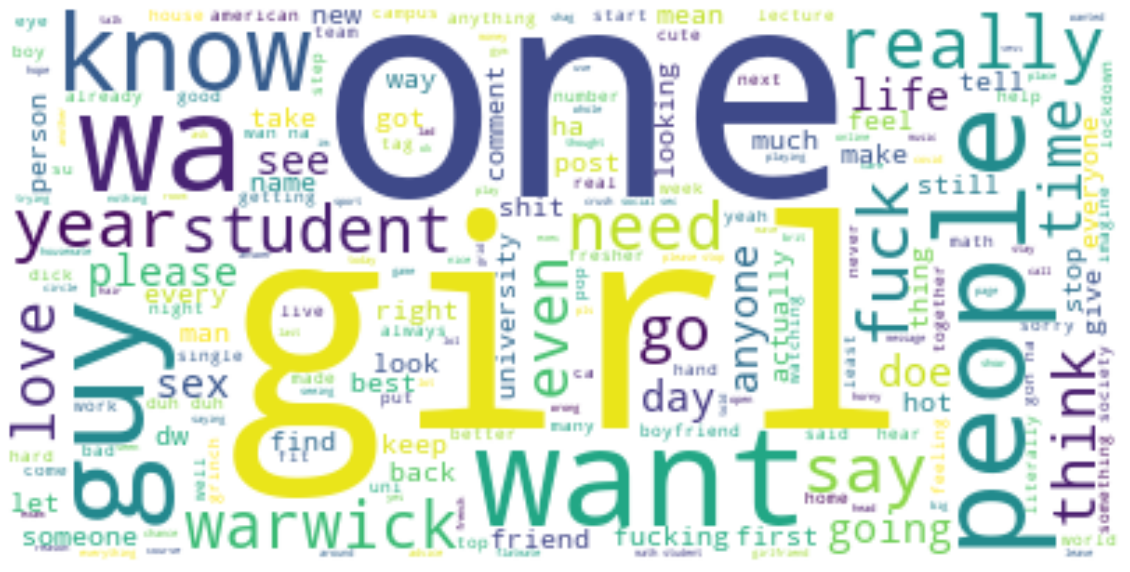

like


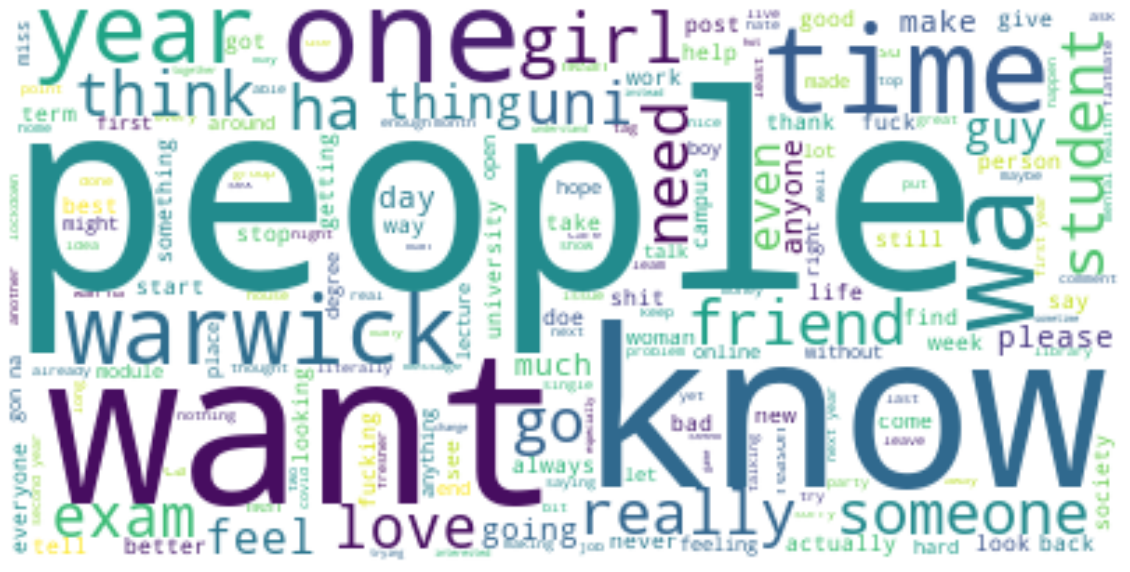

love


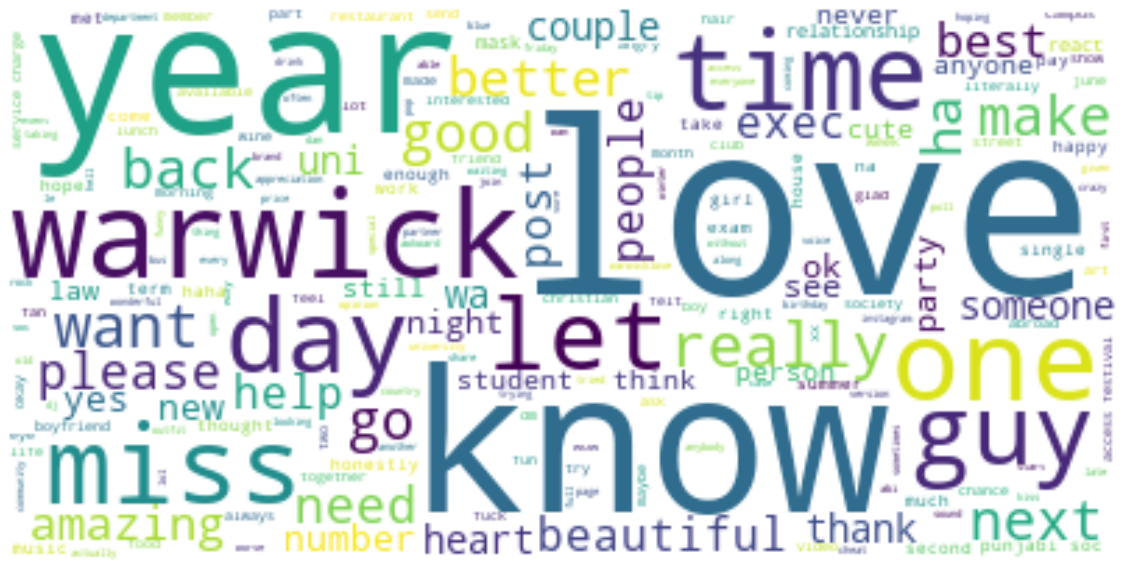

sad


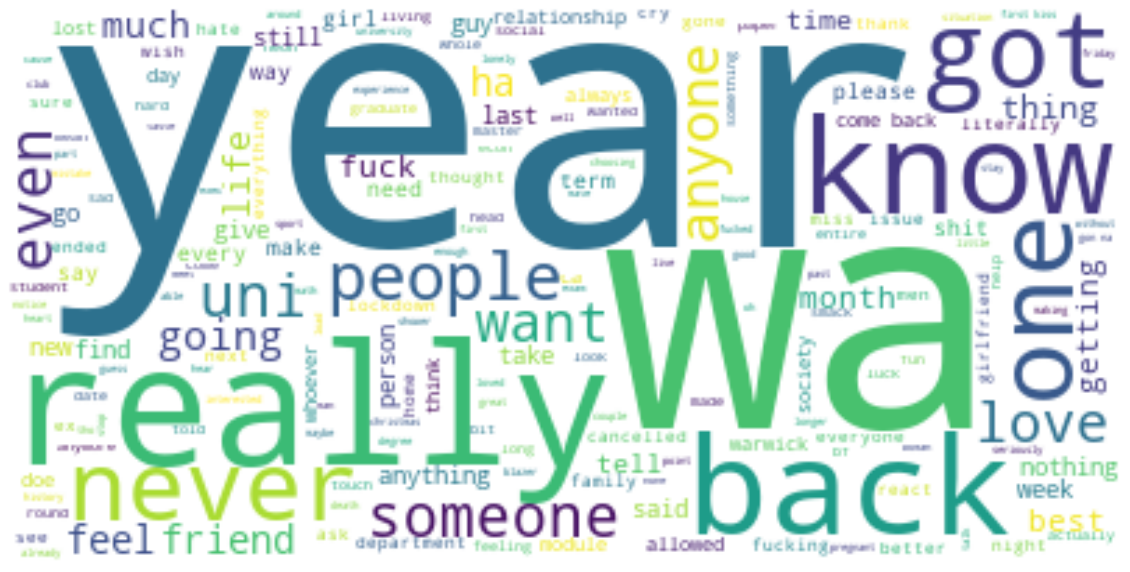

wow


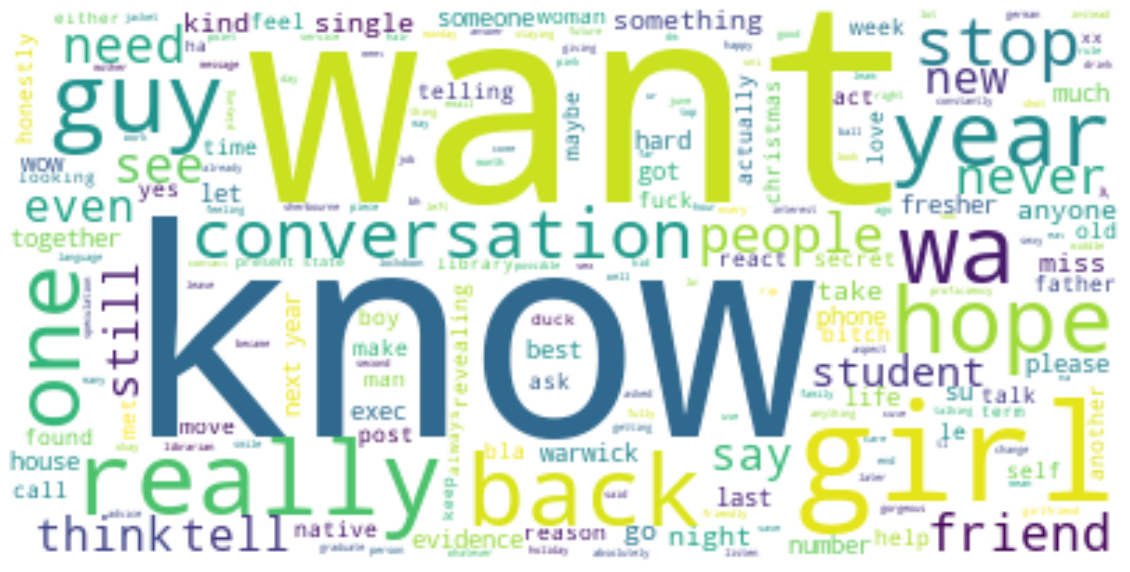

In [ ]:
for i, row in df.groupby(by="top_reaction")['text_joined'].apply(' '.join).reset_index().iterrows():
  print (row.top_reaction)
  wordcloud_spam = WordCloud(background_color="white").generate(row.text_joined)
  plt.figure(figsize = (20,20))
  plt.imshow(wordcloud_spam, interpolation='bilinear')
  plt.axis("off")
  plt.show()


In [ ]:
#Doc2Vec for finding similarities 
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


In [ ]:
tagged_data = [TaggedDocument(row['text'], tags=[row['top_reaction']]) for i, row in df.groupby(by="top_reaction")['text'].agg(sum).reset_index().iterrows()]


In [ ]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=30, min_count=2, epochs=80)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=80)

In [ ]:
#Similarities!
for reaction in reaction_list:
  
  similar_doc = model.docvecs.most_similar(reaction)
  print('most similar to ' + reaction +' : ',similar_doc[0])

most similar to like :  ('angry', 0.2562868893146515)
most similar to love :  ('wow', 0.35463106632232666)
most similar to haha :  ('angry', 0.35411015152931213)
most similar to wow :  ('love', 0.35463112592697144)
most similar to care :  ('angry', 0.27305346727371216)
most similar to angry :  ('sad', 0.3755528926849365)
most similar to sad :  ('angry', 0.3755528926849365)
